<hr>

**<h1><center>Optimalisasi Skema Tarif Angkutan Umum 'Transjakarta'</center></h1>**




<center><img src="https://www.majalahlintas.com/storage/2023/07/13072023-Salah-satu-bus-Transjakarta-melintas-di-Koridor-3-Sumber-Foto-Transjakarta.jpg" width="500" height="340"> <img src="https://podcastnews.id/wp-content/uploads/2022/11/Tap-Kartu-Halte-Transjakarta.jpg" width="500" height="340"> </center>




<hr>

<hr>

**<h2><center>Pendahuluan<h2></center>**

<hr>

****`Notebook Jupyter`* ini merupakan dokumentasi *script-code* penulis ketika berperan *'seakan-akan'* sebagai seorang analis data dari PT Transportasi Jakarta (Transjakarta).***


### **1. Latar Belakang**
Analisis data transaksi penumpang Transjakarta ini membahas mengenai upaya optimalisasi tarif angkutan umum Transjakarta. Analisis ini mencerminkan permasalahan keuangan yang dihadapi oleh perusahaan angkuan umum tersebut ketika menghadapi situsi pemotongan subsidi oleh pemerintah. PT Transportasi Jakarta (Transjakarta) perlu melakukan optimalisasi tarif penumpang guna mempertahankan penyediaan layanan transportasi yang efektif dan efisien bagi warga Jakarta.

Mekanisme transaksi pembayaran tarif penumpang Transjakarta menggunakan uang elektronik berbasis kartu yang dibayarkan berdasarkan data *Tap-In* dan *Tap-Out* penumpang terkait. Melalui analisis data transaksi terebut, penulis mengeksplorasi pemahaman menganai  peluang optimalisasi tarif dan karakteristik Transjakarta yang berimplikasi pada kebijkan subsidi yang diberikan oleh pemerintah. Analisis ini diharapkan mampu memberikan rekomendasi yang konkret untuk meningkatkan efisiensi operasional Transjakarta, menjaga keseimbangan antara keberlanjutan finansial dan aksesibilitas mobilitas publik yang berkelanjutan di Jakarta.

<hr>

### **2. Rumusan Masalah**

Penerapan tarif seragam atau *flat fare* pada angkutan umum Transjakarta dinilai tidak memaksimalkan potensi *revenue* perusahaan. Hal ini sewaktu-waktu dapat menyebabkan masalah operasiona-finansial bagi PT Transjakarta. Terlebih lagi ketika menyebabkan beban subsidi meningkat, tetapi pemerintah secara bertahap memotong subsidi bagi penumpang Transjakarta. Oleh sebab itu, hal ini mendorong rumusan masalah:
- `adakah peluang untuk mengoptimalkan tarif Transjakarta berdasarkan informasi perjalanan penumpang Transjakarta?` dan
- `bagaimana memahami karakteristik penumpang Transjakarta dalam rangka mendorong pendapatan perusahaan?`


<hr>

### **3. Tujuan Analisis**

Analisis data transaksi Transjakarta bertujuan untuk:
- mengeksplorasi peluang optimalisasi tarif angkutan umum Transjakarta guna mendorong pendapatan perusahaan dalam rangka menekan subsidi.
- memahami karakeristik penumpang Transjakarta guna memahami preferensi dalam rangka meningkatkan kualitas layanan dan penumpang angkutan umum Transjakarta.

<hr>

### **4. Metode Analisis**

Analisis ini dilakukan berdasarkan dataset **transaksi penumpang Transjakarta** yang diberikan kepada penulis. Terdapat beberapa informasi penting yang dapat digunakan di antaranya:

1. informasi mengenai perjalanan penumpang yang di antaranya:
- waktu transaksi
- rute bus 
- lokasi *Tap-In*
- lokasi *Tap-Out*
- tarif penumpang

2. karakteristik penumpang transjakarta yang memuat: 
- nama dan ID penumpang
- tanggal lahir dan jenis kelamin penumpang
- bank yang digunakan

Berdasarkan data/informasi yang diberikan, anlisis ini merekomendasi upaya optimalisasi tarif penumpang Transjakarta berdasarkan informasi perjalanan penumpang Transjakarta dan meningkakan kualitas layanan serta penumpang Transjakarta guna meningkatkan pendapatan perusahaan dan menekan subsidi pemerintah.

<hr>

<hr>

**<h2><center>*Data Preparation*<h2></center>**

<hr>

### 1. ***Data Understanding and Preprocessing***

In [1]:
# import modul/libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import missingno

# handle red notice
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None) # menampilkan semua kolom dalam dataset

df = pd.read_csv('Transjakarta.csv') # membaca dataset csv

display(df.sample(5)) # menampilkan 5 baris sampel secara random

display(df.info()) # mengecek jumlah baris dan tipe data perkolom

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
15619,YJXF566K8K87FE,4992399872617,online,Cengkal Lestari,M,1970,JAK.25,Kp. Rambutan - Kalisari,1.0,B03683P,Sbr. Jln. Damai Kalisari,-6.338486,106.85983,9,2023-04-06 17:56:35,B05708P,Term. Kampung Rambutan,-6.308964,106.88165,47.0,2023-04-06 18:46:35,0.0
35816,HYUP429Y7N07AV,370095866460258,emoney,Pranata Tampubolon,F,1979,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00077,Halimun,-6.205137,106.83338,14,2023-04-15 17:35:48,P00052,Dukuh Atas 2,-6.203276,106.82377,15.0,2023-04-15 19:22:59,3500.0
31063,CNAP661O1S16HW,2224519731151218,dki,Puput Mardhiyah,M,1997,NaN,NaN,0.0,B05556P,Sunter Muara,-6.144072,106.85763,7,2023-04-28 08:56:18,P00148,Pasar Baru Timur,-6.162272,106.83811,10.0,2023-04-28 10:55:32,3500.0
4242,CFDN963C5W16SM,3544931989278653,dki,"Artawan Iswahyudi, M.Pd",M,1991,6N,Ragunan - Blok M via Kemang,0.0,B00039P,Ampera Garden,-6.288794,106.81818,6,2023-04-12 05:29:55,B00066P,Arsip Nasional RI 1,-6.279439,106.81987,10.0,2023-04-12 06:26:07,3500.0
6070,WNFM760Z8O62IS,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,Menara Astra,-6.207361,106.82190,7,2023-04-17 06:54:08,B02420P,Menara Thamrin,-6.185275,106.82291,13.0,2023-04-17 07:36:18,20000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

None

#### **Berikut ini penjelasan kolom-kolom pada dataset `Transjakarta`:**

1. `transID`: ID transaksi unik untuk setiap transaksi pembayaran penumpang.
2. `payCardID`: ID kartu yang digunakan penumpang sebagai alat bayar yang digunakan pada saat tap in dan tap out.
3. `payCardBank`: Nama produk kartu pembayaran penumpang yang diterbitkan oleh suatu bank.
4. `payCardName`: Nama penumpang yang tertanam di kartu.
5. `payCardSex`: Jenis kelamin penumpang yang tertanam di kartu.
6. `payCardBirthDate`: Tahun lahir penumpang yang tertanam di kartu.
7. `corridorID`: ID Koridor/rute sebagai kunci untuk pengelompokan rute.(*)
8. `corridorName`: Nama Koridor/rute yang berisi rute awal dan akhir untuk setiap perjalanan.(*)
9. `direction`:  Arah rute dimana 0 untuk pergi, 1 untuk kembali.
10. `tapInStops`: ID Tap In (masuk) yang merupakan kode halte dimana penumpang mengawali perjalanan.
11. `tapInStopsName`: Nama halte dimana penumpang masuk/mengawali perjalanan.
12. `tapInStopsLat`: Garis lintang dari halte Tap In.
13. `tapInStopsLon`: Garis bujur dari halte Tap In.
14. `stopStartSeq`: Nomor urutan dari halte awal dalam koridor, menunjukkan posisi halte tap-in relatif terhadap rute.
15. `tapInTime`: Waktu Tap In menunjukan tanggal dan waktu penumpang memulai perjalanan.
16. `tapOutStops`: ID Tap Out (keluar) yang merupakan kode halte dimana penumpang mengakhiri perjalanan.(*)
17. `tapOutStopsName`: Nama halte dimana penumpang keluar/mengakhiri perjalanan.(*)
18. `tapOutStopsLat`: Garis lintang dari halte Tap Out. (*)
19. `tapOutStopsLon`: Garis bujur dari halte Tap Out. (*)
20. `stopEndSeq`: Nomor urutan dari halte akhir dalam koridor, menunjukkan posisi halte tap-out relatif terhadap rute. (*)
21. `tapOutTime`: Waktu Tap In menunjukan tanggal dan waktu penumpang mengakhiri perjalanan. (*)
22. `payAmount`: Jumlah yang dibayarkan oleh penumpang.(*)

***(\*) terdapat missing value.***

#### **Dalam rangka mempermudah proses analisis, kolom-kolom yang ada pada dataset Transjakarta dapat dikelompokan sebagai berikut:**

- **Kolom-kolom terkait karakteristik penumpang** : `transID`, `payCardID`, `payCardBank`, `payCardName`, `payCardSex`,
`payCardBirthDate`. Kolom-kolom tersebut dapat membantu kita dalam menganalisis dan mengidentifikasi karakteristik penumpang Transjakarta berdasarkan beberapa tolok ukur seperti distribusi penggunaan bank, jenis kelamin dan usia.

- **Kolom-kolom terkait penumpang memulai perjalanan**: `transID`, `corridorID`, `corridorName`, `direction`, `tapInStops`, `tapInStopsName`, `tapInStopsLat`, `tapInStopsLon`, `stopStartSeq`, `tapInTime`. Kolom-kolom tersebut dapat membantu kita dalam menganalisis dan mengidentifikasi perjalanan penumpang ketika mereka mulai menaiki bus.

- **Kolom-kolom terkait penumpang mengakhiri perjalanan**: `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, `payAmount`. Kolom-kolom tersebut dapat membantu kita dalam menganalisis dan mengidentifikasi perjalanan penumpang ketika mereka mengakhiri/ turun dari bus.
      
--> *Pengelompokan kolom-kolom di atas dilakukan guna mempermudah **fokus analisis dan menghandle missing value** karena menampilkan keterkaitan antar kolom dan mencegah informasi yang ***redundant*** yang disebabkan keterkaitan antar kolom.*


In [3]:
# mengecek data duplikat pada dataset Transjakarta
df[df.duplicated() == True]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


--> *Tidak ada data duplikasi yang memiliki record yang sama sepanjang baris pada seluruh baris di dalam dataset Transjakarta*

In [4]:
# mengecek jumlah unique value perkolom
display(df.nunique())

# mengecek unique value pada kolom tertentu
display(df['payAmount'].unique()) # ubah payAmount dengan nama kolom lain untuk mengecek

transID             37900
payCardID            2000
payCardBank             6
payCardName          1993
payCardSex              2
payCardBirthDate       67
corridorID            221
corridorName          216
direction               2
tapInStops           2570
tapInStopsName       2602
tapInStopsLat        2587
tapInStopsLon        2458
stopStartSeq           67
tapInTime           37079
tapOutStops          2230
tapOutStopsName      2248
tapOutStopsLat       2237
tapOutStopsLon       2139
stopEndSeq             74
tapOutTime          35908
payAmount               3
dtype: int64

array([ 3500., 20000.,     0.,    nan])

**Penjelasan penting dari *unique value* beberapa kolom pada dataset `Transjakarta` sebagai berikut:**

1. **transID**: Terdapat 37.900 nilai unik. Jumlah nilai unik sama dengan jumlah baris pada dataset Transjakarta. Hal ini menunjukan peran kolom sebagai *Primary Key* yang menampilkan data transaksi yang berbeda pada setiap baris dalam dataset.
2. **payCardID**: Terdapat 2.000 nilai unik yang menunjukan jumlah penumpang atau pemiliki uang elektronik berbasis kartu yang terlibat dalam dataset.
3. **payCardBank**: Terdapat 6 nilai unik, yaitu 'emoney', 'dki', 'flazz', 'online', 'brizzi' dan 'bni' yang mana menunjukan afiliasi bank berdasarkan jenis uang elektronik berbasis kartu yang digunakan oleh penumpang.
4. **payCardSex**: Terdapat 2 nilai unik, yaitu "M" untuk 'Lkai-laki' dan "F"  untuk 'Perempuan' menunjukan jenis kelamin penumpang.
5. **corridorID**: Terdapat 221 nilai unik yang menunjukan jumlah rute yang dilayani oleh Transjakarta.
6. **corridorName**: Terdapat 216 nilai unik yang nilainya hampir sama dengan kolom corridorID. Asumsi yang dapat digunakan untuk menjelaskan hal tersebut: (1) terdapat coridorID ganda (mungkin akibat perbaruan data) yang memiliki satu nama atau (2) terdapat corridorID yang namanya belum terinput dalam kolom corridorName.
7. **direction**: Terdapat 2 nilai unik, yaitu 0 untuk "Pergi" dan 1 untuk "Kembali".
8. **payAmount**: Terdapat 3 nilai unik, yaitu, 3500., 20000., dan 0 yang menunjukan biaya penumpang Transjakarta.

In [5]:
# Menyesuaikan Tipe Data Perkolom

# kolom payCardBank valuenya disesuaikan dan tipe datanya menjadi category
df['payCardBank']=df['payCardBank'].replace({'emoney':'Bank Mandiri', 'dki':'Bank DKI', 'flazz':'Bank BCA',
                                             'online':'Online', 'brizzi':'Bank BRI', 'bni':'Bank BNI'}).astype('category') 

df['payCardSex']=df['payCardSex'].replace({'M':'Laki-laki', 'F': 'Perempuan'}).astype('category') # kolom payCardSex valuenya disesuaikan dan tipe datanya menjadi category

df['payCardBirthDate']=pd.to_datetime(df['payCardBirthDate'], format='%Y').dt.year # kolom payCardBirthDate menjadi tahun


df['direction']=df['direction'].replace({0.0: 0, 1.0: 1}).astype('category') # kolom direction valuenya disesuaikan dan tipe datanya menjadi category

# kolom tapInTime dan tapOutTime tipe datanya menjadi datetime
df['tapInTime']=pd.to_datetime(df['tapInTime'])
df['tapOutTime']=pd.to_datetime(df['tapOutTime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  category      
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  category      
 5   payCardBirthDate  37900 non-null  int32         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  category      
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

--> *Penyesuaian value dan tipe data bertujuan untuk memastikan bahwa data disimpan dalam format yang sesuai untuk untuk mempermudah proses analisis dan interpretasi data.*


In [6]:
# Menampilkan Statistik Deskriptif dari dataset Transjakarta
df.describe()

,payCardID,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900,36556.000000,36556.000000,36556.000000,36556,36893.000000
mean,4.250060e+17,1990.089314,-6.214838,106.841554,13.572480,2023-04-16 08:05:29.462770688,-6.214651,106.841233,21.219909,2023-04-16 09:19:44.697997824,2699.712683
min,6.040368e+10,1946.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000
25%,1.800442e+14,1982.000000,-6.245863,106.803470,4.000000,2023-04-10 09:02:15,-6.247225,106.801750,11.000000,2023-04-10 10:18:06.249999872,0.000000
50%,3.507947e+15,1990.000000,-6.214587,106.834830,10.000000,2023-04-16 17:38:42.500000,-6.214718,106.834580,18.000000,2023-04-16 19:03:14,3500.000000
75%,4.699023e+15,2001.000000,-6.175528,106.882270,19.000000,2023-04-22 05:12:02.500000,-6.174736,106.883030,29.000000,2023-04-21 23:26:00.249999872,3500.000000
max,4.997694e+18,2012.000000,-6.089429,107.023950,68.000000,2023-04-30 21:55:41,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000
std,1.321699e+18,13.051482,0.057911,0.060369,12.237623,NaN,0.059022,0.060999,13.800689,NaN,4212.225592


**Berdasarkan statistik deskriptif di atas, dapat diketahui bahwa:**

1. `payCardBirthDate`:
    - **MinMax**: Menunjukan variasi tahun lahir penumpang Transjakarta dengan range 1946-2012 dimana pertahun 2024, penumpang termuda berusia sekitar 12 tahun dan penumpang tertua berusia sekitar 78 tahun.
    - **MeanMedian**: Kedua nilai sangat dekat, menunjukkan distribusi data yang hampir mendekati normal.

2. `payAmount`:
    - **MinMax**: Menunjukan variasi biaya (pembayaran) penumpang transjakarta dimana nilai minimal pembayaran adalah Rp 0 yang mungkin menunjukan terdapat penumpang yang melakukan perjalanan gratis dan nilai maksimumnya adalah Rp 20.000 menunjukkan pembayaran tertinggi yang merupakan *Royaltrans*, lini premium transjakarta.
    - **MeanMedian**: Nilai rata-rata (mean) adalah sekitar 2.699,71, sementara median (nilai tengah atau 50% quantile) adalah 3.500. Median yang lebih tinggi dari mean menunjukkan bahwa distribusi pembayaran memiliki ekor yang panjang di sebelah kiri atau distribusi yang condong ke kiri, di mana ada sejumlah transaksi dengan nilai sangat rendah yang menarik rata-rata ke bawah.

3. `tapInTime` `tapOutTime`:
    - **MinMax**: Menunjukan rentan waktu dataset ini merecord aktivitas perjalanan penumpang Transjakarta, yaitu selama bulan April 2023 yang dimulai pada 2023-04-01 dan berakhir pada 2023-04-30.
    - **Mean**: Waktu rata-rata ketika penumpang masuk (tap in) ke Transjakarta adalah sekitar 2023-04-16 08:05:29. Waktu rata-rata ketika penumpang keluar (tap out) dari Transjakarta adalah sekitar 2023-04-16 09:19:44.

<hr>

### 2. ***Data Cleaning***

In [7]:
# menyalin DataFrame dataset untuk antisipasi
df_copy=df.copy()
df_copy.sample(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
24652,VJMY574Z1V36GY,180040670397460,Bank Mandiri,Dasa Siregar,Perempuan,1992,6H,Senen - Lebak Bulus,0.0,B02708P,Pejambon,-6.175454,106.83269,8,2023-04-19 18:15:03,P00073,GOR Sumantri,-6.221618,106.832245,29.0,2023-04-19 20:14:36,3500.0
10646,WANM442B1E27EI,4199450082632933049,Bank BRI,"Nadine Andriani, S.IP",Laki-laki,1974,7C,Cibubur - BKN,1.0,P00016,BKN,-6.257751,106.87000,0,2023-04-26 16:21:50,B00248P,Cibubur Junction,-6.368735,106.893660,2.0,2023-04-26 18:19:47,3500.0
25742,IFKD385E4V40HF,6543676226758108,Bank DKI,Kairav Rajasa,Perempuan,2002,5N,Kampung Melayu - Ragunan,1.0,B02781P,Pertigaan Pejaten Barat,-6.275464,106.82066,29,2023-04-20 20:26:06,B00243P,Cervino Village,-6.224355,106.851650,58.0,2023-04-20 22:13:39,3500.0
26555,TTUW264O1V24FZ,36006226446453,Bank BNI,Tgk. Galang Firmansyah,Perempuan,1985,9A,PGC 2 - Grogol 2,0.0,P00249,Tebet Eco Park II Arah Barat,-6.243338,106.85212,7,2023-04-21 17:15:53,P00119,Kuningan Barat,-6.237250,106.827940,11.0,2023-04-21 18:43:10,3500.0
8190,AQJJ214M1Y31EC,2720484776954605,Bank DKI,Bancar Irawan,Laki-laki,1999,3B,Rusun Flamboyan - Cengkareng,1.0,B03041P,Puskesmas Cengkareng,-6.144546,106.72866,4,2023-04-20 16:38:26,B02808P,Perumahan KFT 1,-6.135093,106.729830,6.0,2023-04-20 18:08:36,0.0


In [8]:
# menampilkan jumlah missing value perkolom
df_copy.isna().sum().sort_values(ascending = False)

tapOutStops         2289
corridorName        1930
tapOutTime          1344
stopEndSeq          1344
tapOutStopsLon      1344
tapOutStopsLat      1344
tapOutStopsName     1344
corridorID          1257
tapInStops          1213
payAmount           1007
stopStartSeq           0
tapInTime              0
transID                0
tapInStopsLon          0
payCardID              0
tapInStopsName         0
direction              0
payCardBirthDate       0
payCardSex             0
payCardName            0
payCardBank            0
tapInStopsLat          0
dtype: int64

In [9]:
# menampilkan 5 baris yang memiliki minimal 1 missing value secara acak
df_copy[df_copy.isna().any(axis=1)].sample(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
16140,YLKV156J3M79VY,2299346377262087,Bank DKI,Karma Laksmiwati,Laki-laki,1969,12,Tanjung Priok - Pluit,0.0,P00170,Penjaringan,-6.126306,106.79203,17,2023-04-07 06:08:25,NaN,Pluit,-6.115795,106.79037,18.0,2023-04-07 07:47:29,3500.0
28824,QIFS191M4E12YI,180092456265254,Bank Mandiri,Fitriani Mansur,Laki-laki,2007,1P,Senen - Blok M,0.0,B00291P,Dana Reksa,-6.181365,106.82451,14,2023-04-25 17:03:54,NaN,Plaza Sentral,-6.216247,106.81676,26.0,2023-04-25 18:07:54,3500.0
23516,MQUD442P8N43FO,3552994986533131,Bank DKI,Gilang Iswahyudi,Laki-laki,1976,NaN,NaN,0.0,P00242,Swadarma,-6.237550,106.76065,4,2023-04-18 21:36:13,P00221,Seskoal,-6.238064,106.77121,6.0,2023-04-18 23:18:31,3500.0
30586,UGLH015L5V56MC,36191244854712,Bank BNI,dr. Hasim Prasasta,Laki-laki,1992,2P,Gondangdia - Senen,1.0,NaN,Kel. Senen,-6.172453,106.84292,1,2023-04-27 21:30:21,B04647P,Sekolah Penabur Gunung Sahari,-6.170053,106.84024,4.0,2023-04-27 23:16:44,3500.0
34408,VACV350O7G47JX,6011158789391307,Bank DKI,"Shania Mustofa, S.Sos",Laki-laki,1969,10D,Kampung Rambutan - Tanjung Priok,1.0,P00153,Pasar Induk Kramat Jati,-6.294215,106.87203,4,2023-04-29 18:32:42,NaN,NaN,NaN,NaN,NaN,NaT,3500.0


<Axes: >

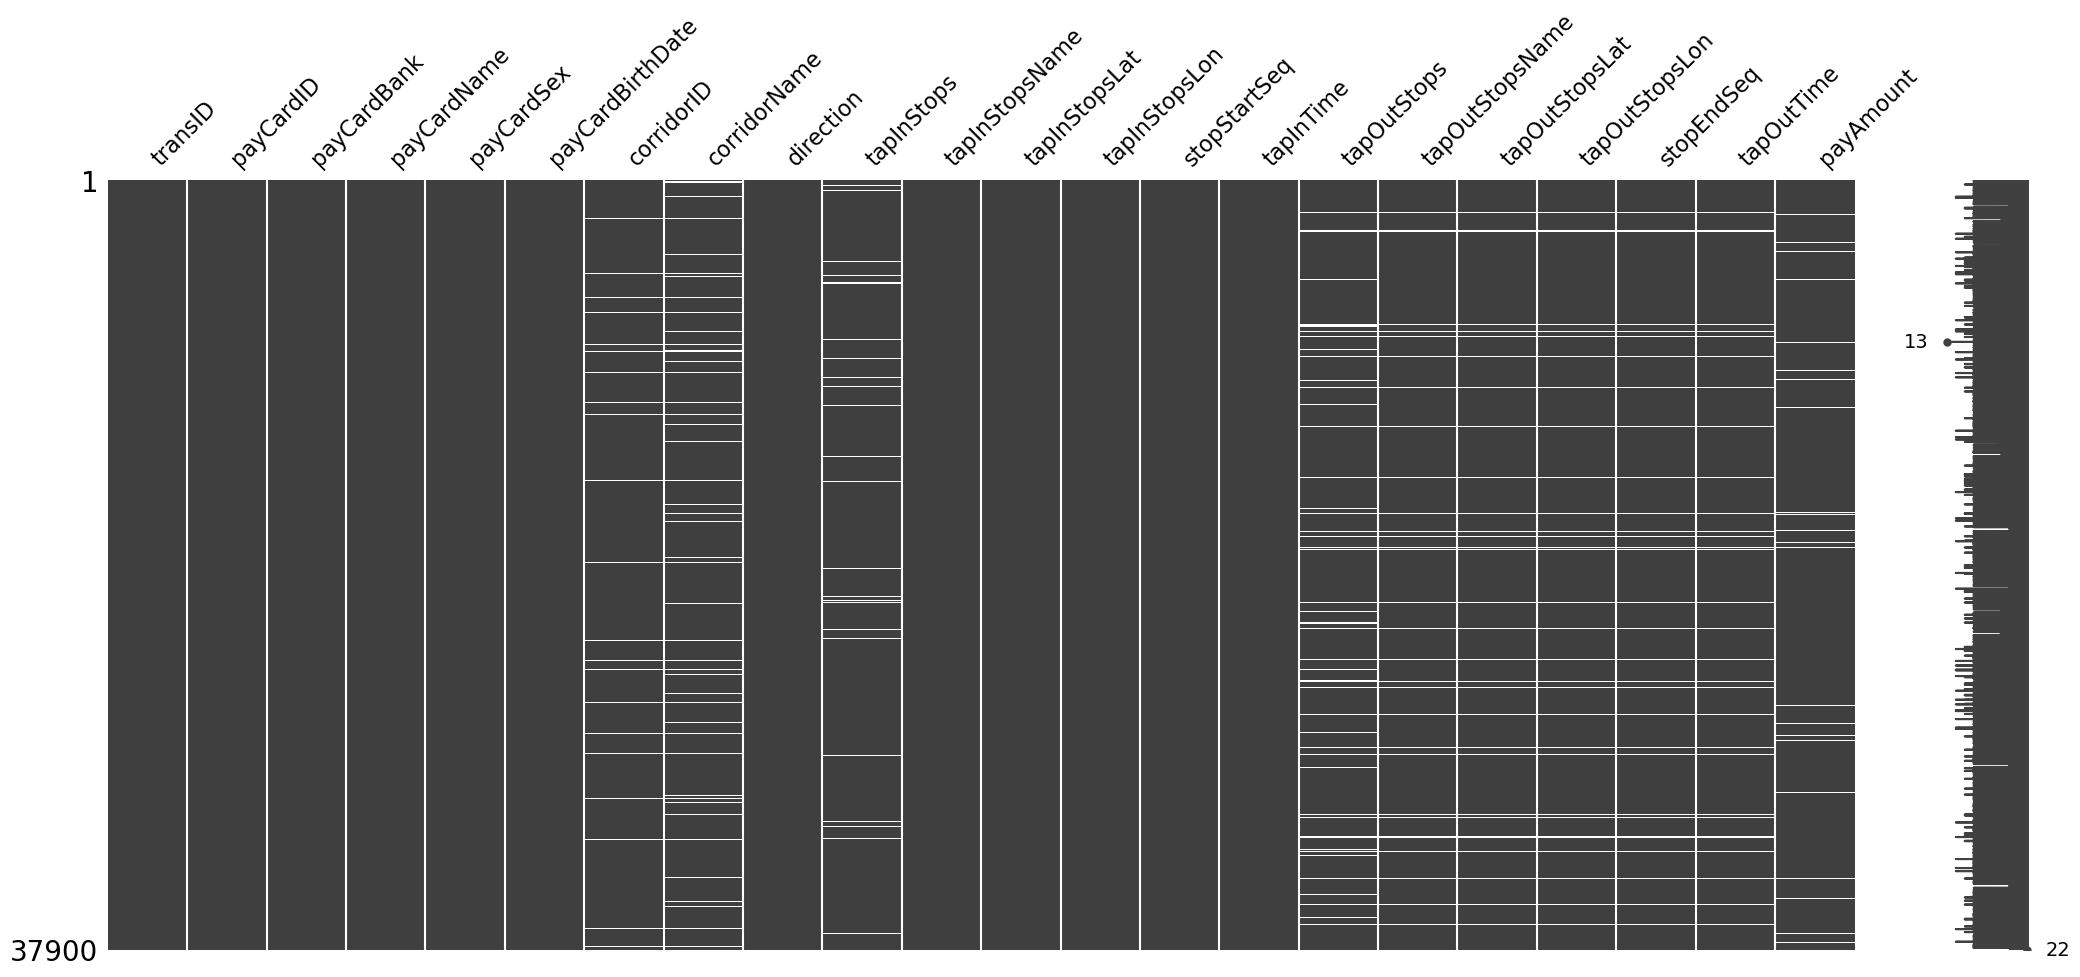

In [10]:
# menampilkan visualisasi missing value
missingno.matrix(df_copy)

In [11]:
# Handling Missing Value berdasarkan pemetaan pengelompokan kolom-kolom
# kelompok kolom terkait penumpang memulai perjalanan

# 1. menyiapkan pemetaan kelompok kolom yang memiliki missing value
kolom_penumpang_mulai = ['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'corridorID', 'corridorName', 'tapInStops']
kolom_mulai_pemetaan = df_copy.dropna(subset=['corridorID', 'corridorName', 'tapInStops']).drop_duplicates(subset=kolom_penumpang_mulai)

#2. memulai pemetaan
pemetaan_kolom1 = kolom_mulai_pemetaan.groupby(['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq']).agg({
    'corridorID': 'first',
    'corridorName': 'first',
    'tapInStops': 'first'
}).reset_index()

def apply_mapping(row, df_kolom_mulai_pemetaan, target):
    if pd.isna(row[target]):
        key = (row['tapInStopsName'], row['tapInStopsLat'], row['tapInStopsLon'], row['stopStartSeq'])
        value = df_kolom_mulai_pemetaan.loc[
            (df_kolom_mulai_pemetaan['tapInStopsName'] == key[0]) & 
            (df_kolom_mulai_pemetaan['tapInStopsLat'] == key[1]) & 
            (df_kolom_mulai_pemetaan['tapInStopsLon'] == key[2]) & 
            (df_kolom_mulai_pemetaan['stopStartSeq'] == key[3]), target
        ]
        return value.iloc[0] if not value.empty else None
    else:
        return row[target]
    
# 3. mengisi nilai yang hilang berdasarkan fungsi pemetaan sebelumnya
for target in ['corridorID', 'corridorName', 'tapInStops']:
    df_copy[target] = df_copy.apply(apply_mapping, axis=1, df_kolom_mulai_pemetaan=pemetaan_kolom1, target=target)

# 4. menghapus baris yang missing valuenya tidak bida terisi
df_copy = df_copy.dropna(subset=['corridorID', 'corridorName', 'tapInStops'])

# 5. Mencetak hasilnya
print(f"Jumlah baris pada dataset awal: {df.shape[0]}")
print(f"Jumlah baris setelah handling missing value: {df_copy.shape[0]}")
print(f"Jumlah baris yang terhapus: {df.shape[0] - df_copy.shape[0]}")

Jumlah baris pada dataset awal: 37900
Jumlah baris setelah handling missing value: 37761
Jumlah baris yang terhapus: 139


#### **Handling Missing Value untuk Kelompok Kolom terkait Penumpang Memulai Perjalanan :**

Dalam usaha untuk membersihkan data pada kelompok kolom terkait 'Penumpang Memulai Perjalanan' pada dataset Transjakarta, beberapa langkah dilakukan sebagai berikut:

1. **Menyiapkan Dataframe Disesuaikan**: membuat dataframe (`kolom_penumpang_mulai`) yang memiliki value lengkap dan penting, dan menghapus baris yang memiliki value kosong dan kurang krusial pada kolom `corridorID`, `corridorName`, dan `tapInStops`, serta menghilangkan duplikasi. Variabel ini akan digunakan untuk pemetaan.

2. **Menyusun Pemetaan**: menyusun pemetaan (`pemetaan_kolom1`) yang menggabungkan data nama halte, lokasi geografis, urutan halte dalam koridor, dan detail koridor. Pemetaan ini berperan untuk mengisi kekosongan data dengan informasi yang telah diverifikasi.

3. **Menerapkan Pemetaan**: membuat fungsi (`apply_mapping`) untuk menggantikan nilai-nilai yang hilang dalam dataset utama dengan data dari dataframe pemetaan berdasarkan lokasi dan urutan halte. Jika tidak ada informasi yang cocok ditemukan, nilai yang hilang dibiarkan kosong.

4. **Menghapus Baris dengan Nilai Hilang**: Setelah menerapkan pemetaan, menghapus baris yang masih memiliki nilai hilang, karena tidak ada informasi yang tersedia untuk mengisi kekosongan tersebut.

Hasilnya, dataset yang awalnya berjumlah 37.900 entri kini memiliki 37.761 entri yang bersih, dengan 139 entri dihapus karena kekurangan informasi. Ini memastikan bahwa data yang tersisa akurat dan siap untuk analisis lanjutan. 

Melalui proses ini, memastikan data yang gunakan adalah yang paling lengkap dan akurat.

In [12]:
# menampilkan upadatan jumlah missing value perkolom
df_copy.isna().sum().sort_values(ascending = False)

tapOutStops         2283
tapOutTime          1340
stopEndSeq          1340
tapOutStopsLon      1340
tapOutStopsLat      1340
tapOutStopsName     1340
payAmount           1006
payCardID              0
tapInTime              0
stopStartSeq           0
tapInStopsLon          0
transID                0
tapInStopsName         0
tapInStops             0
direction              0
corridorName           0
corridorID             0
payCardBirthDate       0
payCardSex             0
payCardName            0
payCardBank            0
tapInStopsLat          0
dtype: int64

--> *Updaten missing value setelah kelompok kolom terkait penumang memulai perjalanan terhandle*

In [13]:
# kelompok kolom terkait penumpang mengakhiri perjalanan
# 1. mengidentifikasi missing value pada kolom 'tapOutStops' 
# tetapi  'tapOutStopsName', 'tapOutStopsLat', dan 'tapOutStopsLon' tersedia
identifikasi_misisng_value = df_copy.index[df_copy['tapOutStops'].isnull() & 
                                   df_copy['tapOutStopsName'].notnull() & 
                                   df_copy['tapOutStopsLat'].notnull() & 
                                   df_copy['tapOutStopsLon'].notnull()]

# 2. menginisialisasi kolom untuk menandai baris yang akan dihapus
df_copy['akan_dihapus'] = False

for idx in identifikasi_misisng_value:
    # Mencoba menemukan nilai 'tapOutStops' yang unik berdasarkan 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon'
    mengisi_missing_val = df_copy[
        (df_copy['tapOutStopsName'] == df_copy.at[idx, 'tapOutStopsName']) &
        (df_copy['tapOutStopsLat'] == df_copy.at[idx, 'tapOutStopsLat']) &
        (df_copy['tapOutStopsLon'] == df_copy.at[idx, 'tapOutStopsLon']) &
        df_copy['tapOutStops'].notnull()]['tapOutStops'].unique()

    if len(mengisi_missing_val) == 1:  # Ditemukan kecocokan unik
        df_copy.at[idx, 'tapOutStops'] = mengisi_missing_val[0]
    else:  # Tidak ada kecocokan unik ditemukan atau lebih dari satu kecocokan ditemukan
        df_copy.at[idx, 'akan_dihapus'] = True

# 3. Menghapus bari yang sudah ditandai
df_copy = df_copy[~df_copy['akan_dihapus']].drop(columns=['akan_dihapus'])

# 4. menghitung dan menampilkan jumlah baris yang terupadate
sisa_missing_tapOutStops = df_copy['tapOutStops'].isnull().sum()
ukuran_dataset_bersih = df_copy.shape[0]

sisa_missing_tapOutStops, ukuran_dataset_bersih

(1340, 37743)

In [14]:
# 5. menghapus record dengan nilai yang hilang dalam kolom-kolom yang ditentukan
df_copy = df_copy.dropna(subset=[
    'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 
    'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount'
])

# Memeriksa ukuran dataset setelah penghapusan
df_copy.shape

(35436, 22)

#### **Handling Missing Value untuk Kelompok Kolom terkait Penumpang Mengakhiri Perjalanan :**

Dalam meng-*handle* kolom terkait 'Penumpang Mengakhiri Perjalanan', fokus utama adalah memastikan data lengkap tentang tempat dan waktu penumpang turun dari bus serta tarif yang dibayar. Berikut langkah-langkah yang dilakukan:

1. **Identifikasi Baris Kosong**: Kami mencari baris tanpa `tapOutStops` tapi memiliki `tapOutStopsName`, `tapOutStopsLat`, dan `tapOutStopsLon`.

2. **Isi Nilai yang Hilang**: Kami mencoba mengisi `tapOutStops` yang kosong berdasarkan kecocokan unik dari lokasi geografis dan nama halte. Jika hanya ada satu kecocokan, kami mengisinya. Jika ada lebih dari satu atau tidak ada kecocokan, baris tersebut ditandai untuk dihapus.

3. **Tandai Baris untuk Dihapus**: Baris yang tidak dapat diisi ditandai dengan kolom 'to_remove' dan dihapus untuk menjaga kualitas data.

4. **Hasil Pembersihan**: Dataset awalnya berjumlah 37.900 entri, setelah pembersihan dan pengisian, tersisa 37.743 entri. Ada 1.340 entri yang tidak bisa diisi dan ditandai untuk dihapus.

Setelah upaya pengisian, kami menghapus semua baris yang masih memiliki nilai hilang di kolom-kolom penting seperti `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount`. Proses ini menggunakan metode `dropna()` untuk memastikan dataset hanya berisi entri lengkap.

**Hasil Akhir**: Dataset bersih berukuran 35.436 entri tanpa nilai hilang. Ini memastikan dataset siap untuk analisis lebih lanjut dengan data yang akurat dan lengkap. 

Proses pembersihan ini penting untuk menjaga integritas data dan memastikan analisis yang dilakukan nanti dapat diandalkan.

<Axes: >

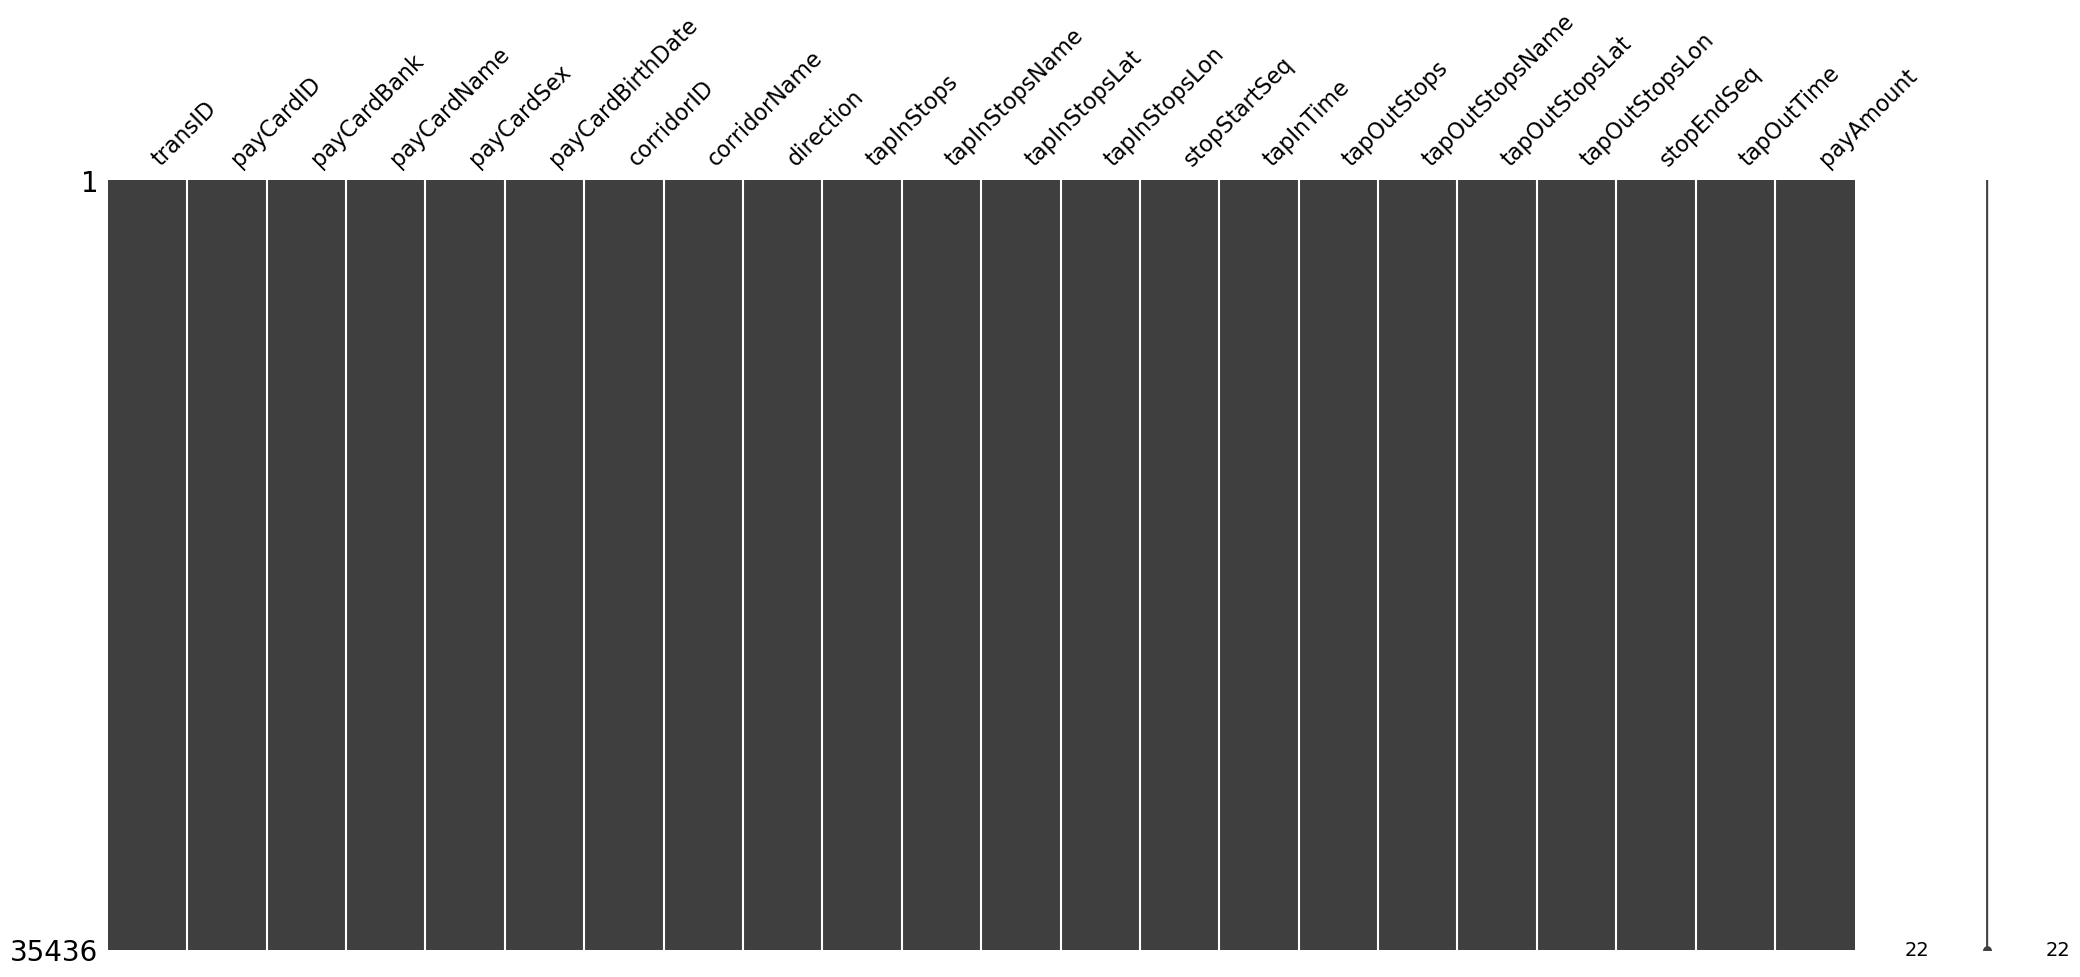

In [15]:
# menampilkan upadate terakhir visualisasi missing value
missingno.matrix(df_copy)

In [16]:
# menampilkan upadat terakhir jumlah missing value perkolom
df_copy.isna().sum().sort_values(ascending = False)

transID             0
payCardID           0
tapOutTime          0
stopEndSeq          0
tapOutStopsLon      0
tapOutStopsLat      0
tapOutStopsName     0
tapOutStops         0
tapInTime           0
stopStartSeq        0
tapInStopsLon       0
tapInStopsLat       0
tapInStopsName      0
tapInStops          0
direction           0
corridorName        0
corridorID          0
payCardBirthDate    0
payCardSex          0
payCardName         0
payCardBank         0
payAmount           0
dtype: int64

--> *Updaten missing value setelah kelompok kolom terkait penumang mengakhiri perjalanan terhandle*

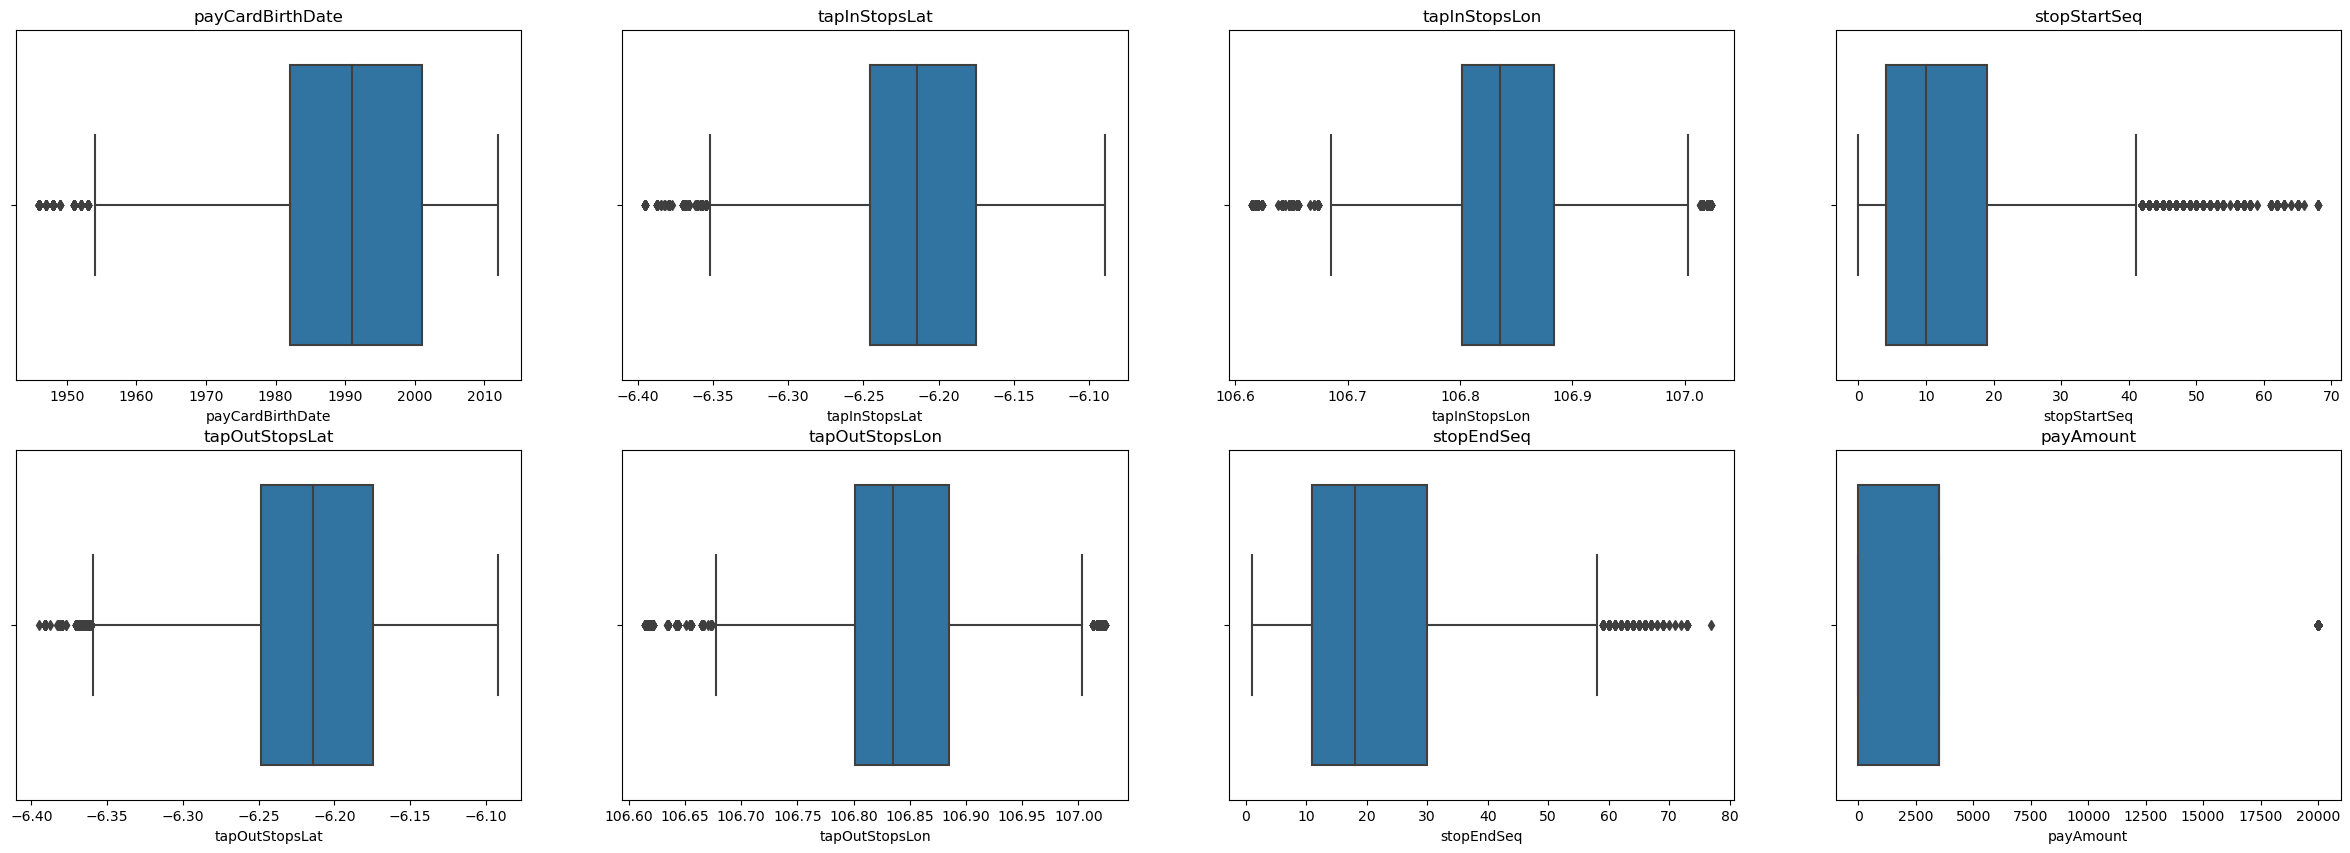

In [17]:
# menampilkan keberadaan visualisasi Outliers 

# menyiapkan varibel DataFrame yang berisi kolom numerik
kol_numerik = df_copy.select_dtypes(include='number')
# mengecualikan kolom 'payCardID' karena value tersebut hanya merepresentasikan ID pengguna kartu
kol_numerik = kol_numerik.drop(columns=['payCardID'])

# menampilkan visualisasi boxplot untuk mengecek missing value
plt.figure(figsize=(30,10))

# menyiapkan variabel iterasi untuk acuan iterasi
iterasi = 0
# iterasi melalui setiap kolom dalam kolom-kolom numerik
for kolom in kol_numerik.columns:
    iterasi += 1
    # membuat subplot dengan 2 baris dan 4 kolom
    plt.subplot(2,4,iterasi)
    # membuat boxplot untuk kolom saat ini
    sns.boxplot(kol_numerik, x=kolom)
    # mengatur judul subplot dengan nama kolom
    plt.title(f'{kolom}')

plt.show()

In [18]:
# Menghitung Jumlah Outliers
for column in kol_numerik.columns:
    # Menghitung kuartil pertama (Q1)
    q1 = df_copy[column].describe().loc['25%']
    
    # Menghitung kuartil ketiga (Q3)
    q3 = df_copy[column].describe().loc['75%']
    
    # Menghitung Rentang Interkuartil (IQR)
    iqr = q3 - q1
    
    # Menghitung batas bawah
    lower_bound = q1 - 1.5 * iqr
    
    # Menghitung batas atas
    upper_bound = q3 + 1.5 * iqr 

    # Menghitung jumlah outliers
    jumlah_outliers = df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)].shape[0]
    
    # Menampilkan hasil jumlah outliers
    print(f"'{column}' memiliki {jumlah_outliers} outliers")

'payCardBirthDate' memiliki 323 outliers
'tapInStopsLat' memiliki 372 outliers
'tapInStopsLon' memiliki 534 outliers
'stopStartSeq' memiliki 1475 outliers
'tapOutStopsLat' memiliki 336 outliers
'tapOutStopsLon' memiliki 426 outliers
'stopEndSeq' memiliki 386 outliers
'payAmount' memiliki 1684 outliers


--> *Kendati penulis mendapati adanya outliers beserta jumlanya, tetapi Outliers dalam dataset Transjakarta harus dipertahankan karena mencerminkan kondisi nyata. Dengan mempertahankan outliers, analisis akan lebih akurat dan representatif dari kondisi layanan bus yang sesungguhnya.*

In [19]:
df_copy.loc[34256].reset_index()


,index,34256
0,transID,XRCN037C1Y15LJ
1,payCardID,180089784129574
2,payCardBank,Bank Mandiri
3,payCardName,Dimaz Mangunsong
4,payCardSex,Laki-laki
5,payCardBirthDate,2006
6,corridorID,7
7,corridorName,Kampung Rambutan - Bidara Cina
8,direction,1.0
9,tapInStops,P00015


<hr>

**<h2><center>*Exploratory Data Analysis (EDA)*<h2></center>**

<hr>

In [20]:
df_analisis = df_copy.reset_index() # inisialisasi variabel baru dataset untuk antisipasi
df_analisis = df_analisis.drop(columns=['index']) # menghapus kolom index

# menampilkan 5 baris teratas dan terbawah dari dataset
display(df_analisis.head(), df_analisis.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,Bank Mandiri,Bajragin Usada,Laki-laki,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,Bank DKI,Gandi Widodo,Perempuan,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,Bank DKI,Emong Wastuti,Perempuan,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,Bank BCA,Surya Wacana,Perempuan,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,Bank BCA,Embuh Mardhiyah,Laki-laki,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
35431,ZWEC949B8Q87QG,4685818286724028395,Bank BRI,Kamila Mahendra,Perempuan,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
35432,YHHK837P6Y95GN,6502902290603767,Bank DKI,Titi Siregar,Laki-laki,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
35433,YXPP627N4G95HO,213159426675861,Bank Mandiri,drg. Zahra Nashiruddin,Perempuan,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
35434,RGVK175U2U98UV,377840859133591,Bank Mandiri,Ana Agustina,Laki-laki,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
35435,FMZZ963S4B68ZP,501862539795,Bank BCA,drg. Leo Najmudin,Perempuan,1985,13,Ciledug - Tendean,0.0,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


In [21]:
df_analisis.shape

(35436, 22)

<hr>

### **1. Analisis Peluang Optimalisasi Tarif Angkutan Umum Transjakarta**

***Analisis ini mengeksplorasi peluang optimalisasi tarif angkutan umum Transjakarta berdasarkan infromasi perjalanan penumpang Transjakarta.***

<hr>

#### 1A. **Distribusi Tarif Yang Dibayaran Penumpang Transjakarta**:
#### Memahami distribusi biaya (tarif) yang dibayarkan oleh Penumpang Transjakarta.

In [22]:
# menyiapkan DataFrame disribusi tarif penumpang Transjakarta
passenger_fare=df_analisis['payAmount'].value_counts().reset_index(name='jumlah_transaksi').sort_values(by='jumlah_transaksi', ascending=False)
passenger_fare

,payAmount,jumlah_transaksi
0,3500.0,17800
1,0.0,15952
2,20000.0,1684


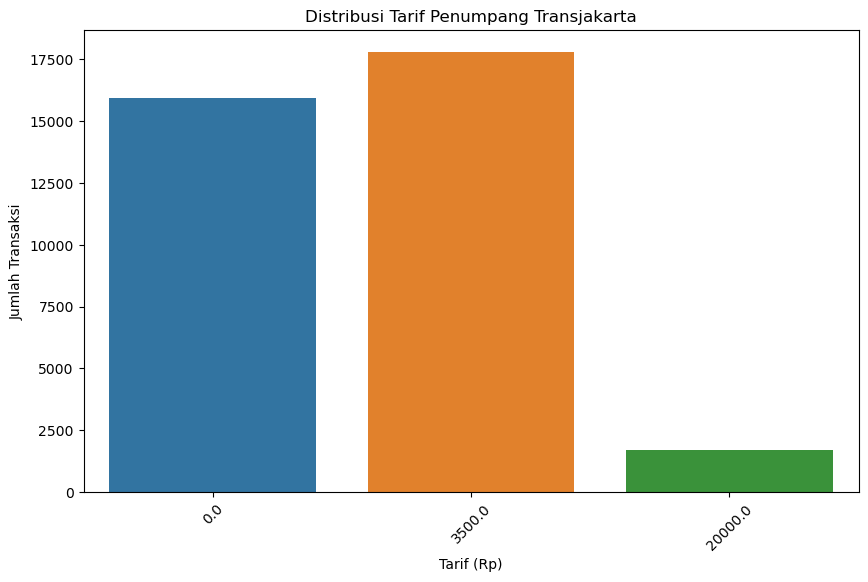

In [23]:
# Menampilkan visuaisasi 
plt.figure(figsize=(10, 6))
sns.barplot(data=passenger_fare, x='payAmount', y='jumlah_transaksi')
plt.title('Distribusi Tarif Penumpang Transjakarta')
plt.xlabel('Tarif (Rp)')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

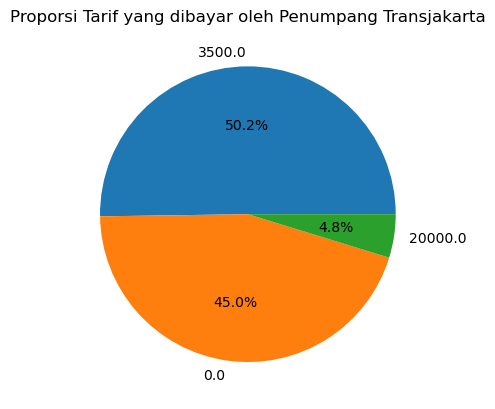

In [24]:
# menampilkan visualisasi proporsi tarif yang dibayar oleh penumpang Transjakarta
plt.pie(passenger_fare['jumlah_transaksi'], labels=passenger_fare['payAmount'], autopct='%1.1f%%')
plt.title('Proporsi Tarif yang dibayar oleh Penumpang Transjakarta')
plt.show()

--> *Visualisasi di atas menampilkan jumlah dan proporsi tarif yang dibayarkan oleh penumpang Transjakarta. Salah satu hal yang digarisbawahi adalah proporsi tarif Rp.0- dimana hal ini mengindikasi jumlah subsidi yang diberikan pemerintah kepada penumpang Transjakarta(*).*

(*) penjelasan insight lebih lanjut dibahas pada bagian bagian penutup notebook.

In [25]:
df_analisis[df_analisis['payAmount'] == 0]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,XTKE052E5E87LN,3587341902618993,Bank DKI,Darmanto Rajasa,Perempuan,1991,JAK.03,Lebak Bulus - Andara,1.0,B03416P,SDN Pondok Labu 11,-6.313269,106.802210,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
12,LZFD368Q3E81HJ,4056836188316,Online,Nadine Utami,Laki-laki,1975,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00608P,Gelanggang Remaja Pasar Minggu,-6.284615,106.837870,5,2023-04-03 05:38:44,B01062P,Jln. Gabus Raya,-6.301222,106.83623,17.0,2023-04-03 06:09:17,0.0
17,ZYRL615G4C05RD,5430018591726410,Bank DKI,Karna Waskita,Laki-laki,1981,JAK.88,Terminal Tanjung Priok - Ancol Barat,0.0,B00722P,Gunung Sahari Mangga Dua Timur,-6.137032,106.832540,20,2023-04-03 06:43:49,B05989P,Jln. Ancol Barat 6,-6.124810,106.81983,36.0,2023-04-03 07:30:45,0.0
19,ZJVI960B9I42DA,343851798729291,Bank Mandiri,Garang Utama,Perempuan,1997,JAK.16,Cililitan - Condet,0.0,B02144P,Lippo Mall Kramat Jati,-6.270835,106.867410,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0
22,SYLN486U0E02TA,2295833910329055,Bank DKI,Taufik Farida,Perempuan,1981,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05023P,Simpang Pahlawan Revolusi 1,-6.238658,106.899461,28,2023-04-03 05:43:14,B03135P,RS Duren Sawit 2,-6.232262,106.91019,39.0,2023-04-03 06:12:52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35427,XQDZ821C9G88JD,2712823212983860,Bank DKI,"drg. Maras Wibowo, S.Ked",Perempuan,1966,JAK.30,Grogol - Meruya via Roxy,1.0,B01209P,Jln. Kartika Meruya Selatan,-6.203099,106.736730,14,2023-04-19 16:31:09,B04071P,Sbr. Masjid Nurul Falah Grogol,-6.170757,106.78477,53.0,2023-04-19 19:13:53,0.0
35428,YHJT665I6G08OS,4775206940093,Online,"Cahyo Sudiati, M.Farm",Laki-laki,1979,JAK.52,Terminal Kalideres - Terminal Muara Angke,1.0,B01087P,Jln. Gunung Galunggung 1,-6.142286,106.737120,29,2023-04-28 16:38:56,B03207P,RSUD Cengkareng,-6.142238,106.73398,30.0,2023-04-28 18:35:16,0.0
35429,GNET512K3A93CA,3500965207195341,Bank DKI,Latika Salahudin,Perempuan,2000,JAK.80,Rawa Buaya - Rawa Kompeni,0.0,B02485P,MTsN 37,-6.097910,106.702370,39,2023-04-19 08:16:10,B03053P,Puskesmas Kel. Kamal II,-6.100938,106.69786,42.0,2023-04-19 10:32:30,0.0
35430,ZXVG342K6T27GU,4475487986105118550,Bank BRI,"Tgk. Dipa Purnawati, S.E.I",Perempuan,2012,JAK.39,Kalimalang - Duren Sawit,0.0,B04489P,Sbr. SMPN 252,-6.239289,106.942290,27,2023-04-14 11:36:12,B01624P,Jln. Swakarsa III Pondok Kelapa,-6.244759,106.94249,35.0,2023-04-14 13:15:25,0.0


In [26]:
df_mengecek = df_analisis[['corridorID', 'corridorName']][df_analisis['payAmount'] == 0].sample(100)
df_mengecek

#Mengecek apakah ada lini tertentu yang memiliki nilai gratis

,corridorID,corridorName
23133,11M,Rusun Rawa Bebek - Bukit Duri
11037,JAK.46,Pasar Minggu - Jagakarsa
35159,JAK.07,Tanah Abang - Grogol via Tawakal
7806,2E,Rusun Rawa Bebek - Kodamar
32877,2E,Rusun Rawa Bebek - Kodamar
...,...,...
31854,JAK.37,Cililitan - Condet via Kayu Manis
35046,2H,Rusun Jati Rawasari - Senen
12232,JAK.60,Kelapa Gading - Rusun Kemayoran
34445,JAK.52,Terminal Kalideres - Terminal Muara Angke


In [27]:
df_mengecek1 = df_analisis[['corridorID', 'corridorName']][(df_analisis['payAmount'] == 0) & (~df_analisis['corridorID'].str.startswith('JAK'))].sample(100)
df_mengecek1

#Menandakan bukan hanya lini JAK yang menyebabkan gratis

,corridorID,corridorName
17823,BW9,Monas - Pantai Indah Kapuk
21756,11K,Rusun Komarudin - Penggilingan
443,2E,Rusun Rawa Bebek - Kodamar
3567,11P,Rusun Pondok Bambu - Walikota Jakarta Timur
2599,3A,Rusun Pesakih - Kalideres
...,...,...
20296,BW9,Monas - Pantai Indah Kapuk
30751,12F,Rusun Marunda - Rusun Waduk Pluit
3633,3C,Rusun Kapuk Muara - Penjaringan
13329,11K,Rusun Komarudin - Penggilingan


#### 1B. **Distribusi Koridor Transjakarta dengan frekuensi transaksi tertinggi**:
#### Memahami distribusi rute Transjakarta dengan tingkat kepadatan tertinggi.

In [28]:
# mengecek popularitas halte secara keseluruhan
display(df_analisis['corridorName'].value_counts().head(5))

display(df_analisis['corridorName'].value_counts().tail(5))

display(df_analisis['corridorName'].nunique())

corridorName
Cibubur - Balai Kota                       392
Ciputat - CSW                              382
Harmoni - Jakarta International Stadium    342
Pulo Gadung - Monas                        339
Kalideres - Bundaran HI via Veteran        335
Name: count, dtype: int64

corridorName
Term. Pulo Gadung - Lampiri                       30
Tanah Abang - Kebayoran Lama via Pos Pengumben    22
Kampung Rambutan - Blok M                         17
Stasiun Tebet - Kampung Melayu                     2
Tanah Abang - St. Gondangdia                       2
Name: count, dtype: int64

213

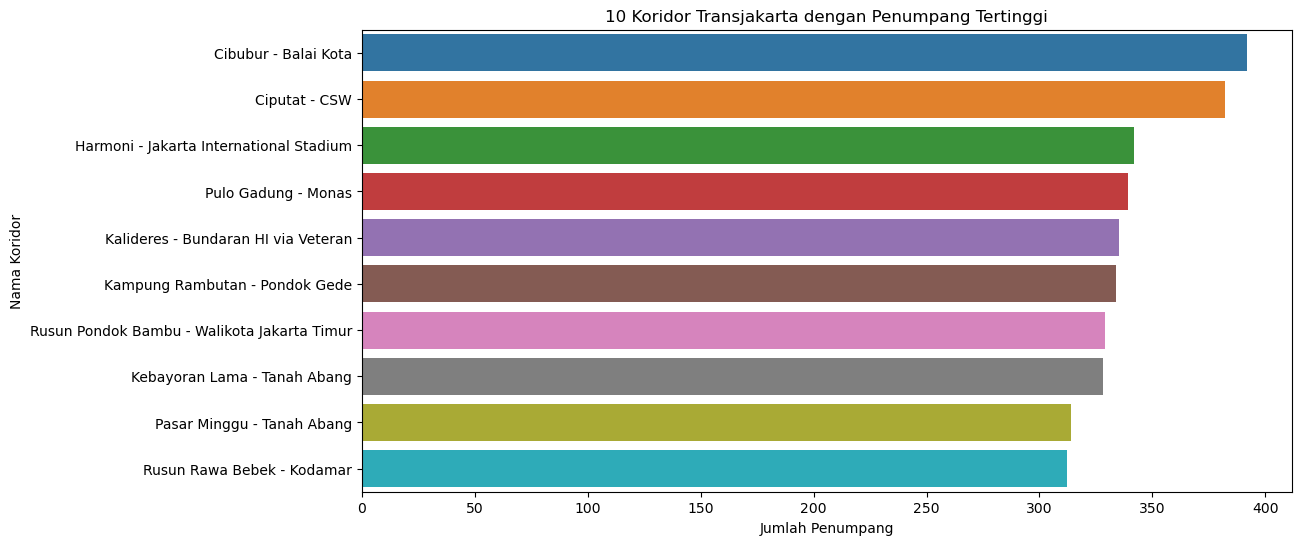

In [29]:
# menyiapkan DataFrame 10 koridor dengan popularitas tertinggi
top_corridor = df_analisis['corridorName'].value_counts().reset_index(name='jumlah_penumpang').head(10)

# menampilkan visualisasi 10 koridor dengan popularitas tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_corridor, x='jumlah_penumpang', y='corridorName')
plt.title('10 Koridor Transjakarta dengan Penumpang Tertinggi')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Nama Koridor')
plt.show()

--> *Visualisasi di atas menampilkan 10 rute (koridor) dengan *trafic* atau kunjungan penumpang tertinggi dari total 213 rute yang disediakan oleh PT Transjakarta. Ini menyumbangkan *insight* terhadap ekplorasi optimalisasi tarif/biaya penumpang(*).*

(*) penjelasan insight lebih lanjut dibahas pada bagian bagian penutup notebook.

#### 2C. **Distribusi Pola Perjalanan Transjakarta dengan frekuensi transaksi tertiggi**:
<!-- #### Memahami distribusi rute Transjakarta dengan tingkat kepadatan tertinggi. -->

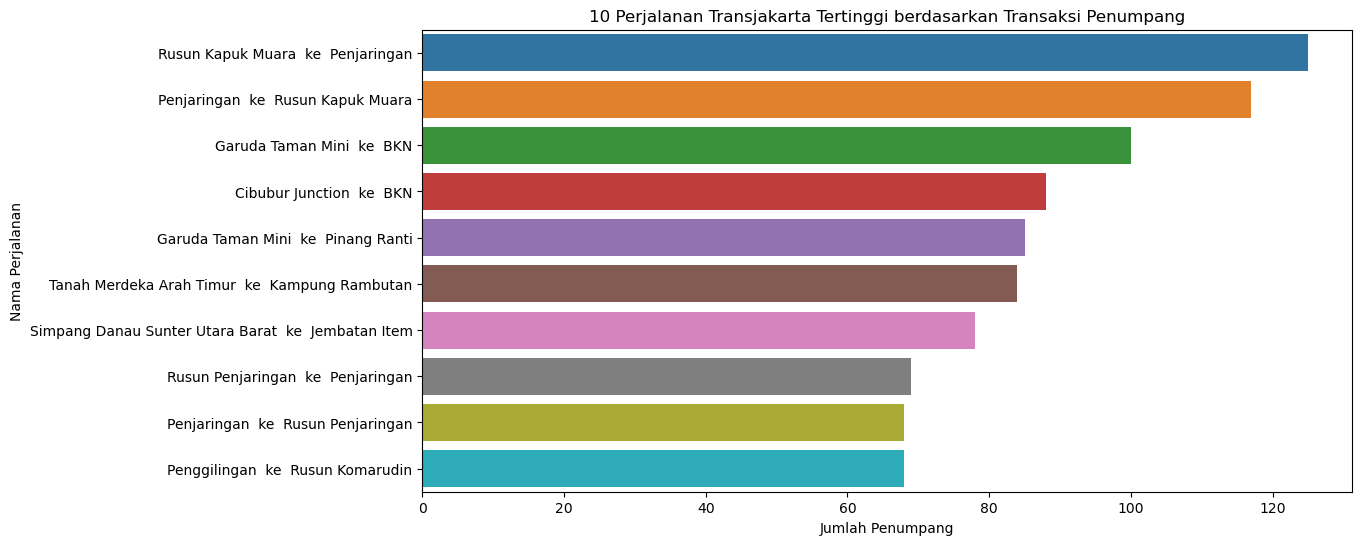

In [30]:
# menyiapkan DataFrame pola perjalanan
best_trip = df_analisis[['corridorName', 'tapInStopsName', 'tapOutStopsName']]
best_trip['trip'] = df_analisis['tapInStopsName'] + '  ke  ' + df_analisis['tapOutStopsName']
best_trip_passenger = best_trip['trip'].value_counts().reset_index(name='jumlah_penumpang').head(10)

# menampilkan visualisasi trip terbanyak berdasarkan transaksi penumpang
plt.figure(figsize=(12, 6))
sns.barplot(data=best_trip_passenger, x='jumlah_penumpang', y='trip')
plt.title('10 Perjalanan Transjakarta Tertinggi berdasarkan Transaksi Penumpang')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Nama Perjalanan')
plt.show()

--> *Visualisasi di atas menampilkan 10 perjalanan Transjakarta dengan frekuensi tertinggi berdasarkan transaksi penumpang. Ini menyumbangkan *insight* terhadap ekplorasi optimalisasi tarif/biaya penumpang(*).*

(*) penjelasan insight lebih lanjut dibahas pada bagian bagian penutup notebook.

<hr>

### **2. Analisis Karakteristik Penumpang Transjakarta**

***Analisis ini berupaya untuk memahami karakeristik penumpang Transjakarta guna memahami preferensi mereka berdasarkan beberapa tolok ukur yang tersedia dalam dataset***

<hr>

#### 2A. **Distribusi Gender Penumpang Transjakarta**:
#### Memahami proporsi gender penumpang Transjakarta.

In [33]:
passenger_gender = df_analisis[['payCardID', 'payCardSex']].groupby('payCardSex').size().reset_index(name='jumlah_gender')
passenger_gender

,payCardSex,jumlah_gender
0,Laki-laki,16533
1,Perempuan,18903


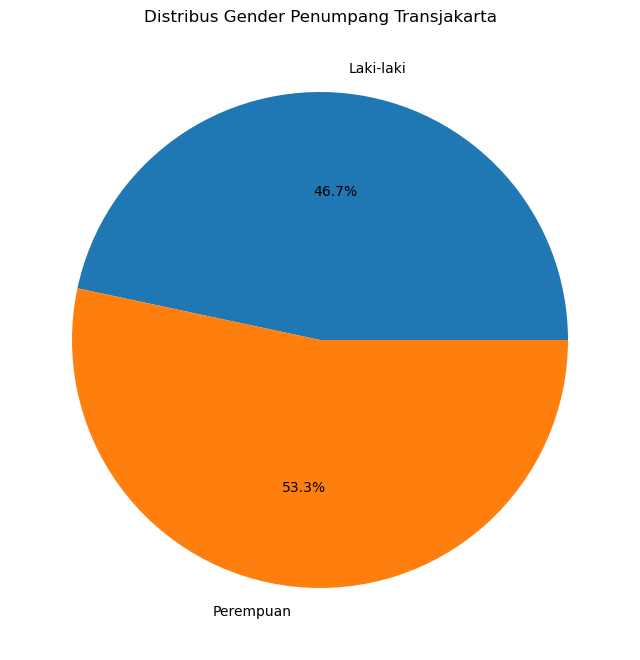

In [34]:
# menampikan visualisasi proporsi gender penumpang Transjakarta menggunakan pie chart
plt.figure(figsize=(8,10))
plt.pie(x=passenger_gender['jumlah_gender'], labels=passenger_gender['payCardSex'], autopct='%1.1f%%')
plt.title('Distribus Gender Penumpang Transjakarta')
plt.show()

--> *Proporsi penumpang Transjakarta terbanyak merupkan wanita.*

#### 2B. **Distribusi Usia Penumpang Transjakarta**:
#### Memahami proporsi usia penumpang Transjakarta.

In [35]:
# membuat kolom umur berdasarkan kolom payCardBirthDate
passenger_age = df_analisis[['payCardID', 'payCardBirthDate']]
passenger_age['age'] = 2024 - passenger_age['payCardBirthDate']
passenger_age


,payCardID,payCardBirthDate,age
0,180062659848800,2008,16
1,4885331907664776,1997,27
2,4996225095064169,1992,32
3,639099174703,1978,46
4,570928206772,1982,42
...,...,...,...
35431,4685818286724028395,2004,20
35432,6502902290603767,1974,50
35433,213159426675861,1976,48
35434,377840859133591,1976,48


In [36]:
# menampilkan jumlah penumpang Transjakarta berdasarkan usia
passenger_age = passenger_age[['payCardID', 'age']].groupby('age').size().reset_index(name='jumlah_usia')
passenger_age['bin_age']=pd.qcut(passenger_age['age'],4)
passenger_age

,age,jumlah_usia,bin_age
0,12,759,"(11.999, 28.25]"
1,13,699,"(11.999, 28.25]"
2,14,702,"(11.999, 28.25]"
3,15,730,"(11.999, 28.25]"
4,16,766,"(11.999, 28.25]"
...,...,...,...
61,73,47,"(60.75, 78.0]"
62,75,7,"(60.75, 78.0]"
63,76,80,"(60.75, 78.0]"
64,77,16,"(60.75, 78.0]"


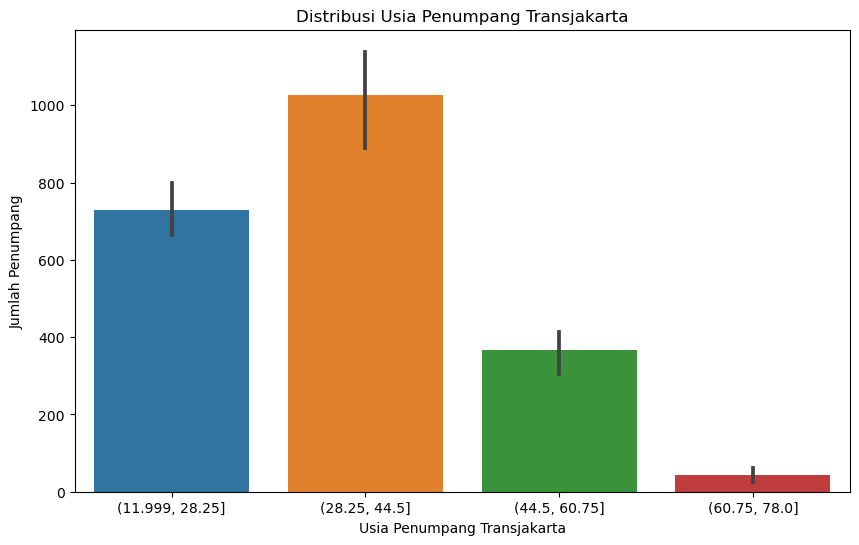

In [37]:
# menampilkan visualisasi distribusi umur penumpang Transjakarta
plt.figure(figsize=(10, 6))

# visualisasi dengan barplot
# plt.bar(passenger_age['bin_age'], passenger_age['jumlah_usia'], color='blue')
sns.barplot(data=passenger_age,x='bin_age',y='jumlah_usia')
plt.xlabel('Usia Penumpang Transjakarta')
plt.ylabel('Jumlah Penumpang')
plt.title('Distribusi Usia Penumpang Transjakarta')


# # visualisasi dengan lineplot
# plt.plot(passenger_age['age'], passenger_age['jumlah_usia'], color='orange')
# plt.grid()
# plt.xlabel('Usia Penumpang Transjakarta')
# plt.ylabel('Jumlah Penumpang')
# plt.title('Distribusi Usia Penumpang Transjakarta')
plt.show()

--> *Penumpang TransJakarta terbanyak berada di rentang usia 30-40 dan paling sedikit di rentang usia 60 tahun keatas.*

#### 2C. **Distribusi Penggunaan Bank Penumpang Transjakarta**:
#### Memahami proporsi penggunaan bank oleh penumpang Transjakarta.

In [38]:
# menyiapkan DataFrame disribusi penumpang Transjakarta berdasarkan bank yang digunakan
passenger_bank=df_analisis['payCardBank'].value_counts().reset_index(name='jumlah_penguna')
passenger_bank=passenger_bank.rename(columns={'payCardBank':'nama_bank', 'jumlah_penguna':'jumlah_pengguna'})
passenger_bank

,nama_bank,jumlah_pengguna
0,Bank DKI,17604
1,Bank Mandiri,6475
2,Bank BRI,3237
3,Bank BCA,2970
4,Online,2622
5,Bank BNI,2528


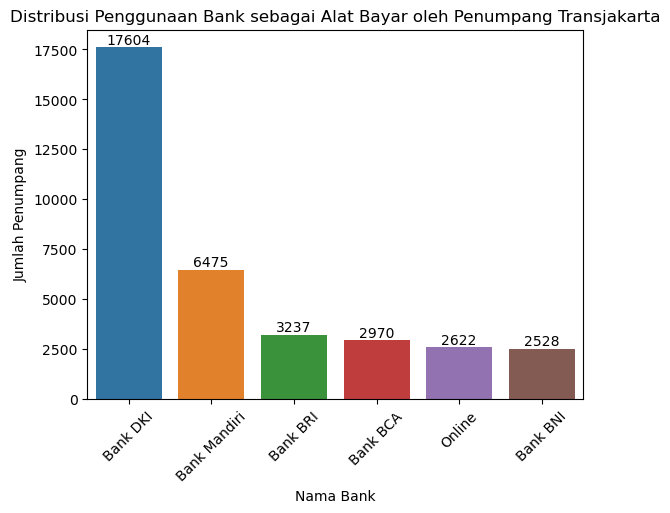

In [39]:
# menampilkan visualisasi distribusi penggunaan bank oleh penumpang Transjakarta

# mengurutkan penggunaan bank terbanyak berdasarkan jumlah pengguna
passenger_bank_sorted = passenger_bank.sort_values(by='jumlah_pengguna', ascending=False)

# Menampilkan visualisasi distribusi penggunaan bank oleh penumpang Transjakarta dengan urutan yang diurutkan
sns.barplot(data=passenger_bank_sorted, x='nama_bank', y='jumlah_pengguna', order=passenger_bank_sorted['nama_bank'])

# Menambahkan teks ke dalam setiap bar dengan alignment
for index, row in passenger_bank_sorted.iterrows():
    plt.text(row.name, row.jumlah_pengguna, str(row.jumlah_pengguna),
             color='black', ha='center', va='bottom')

plt.xlabel('Nama Bank')
plt.ylabel('Jumlah Penumpang')
plt.title('Distribusi Penggunaan Bank sebagai Alat Bayar oleh Penumpang Transjakarta')
plt.xticks(rotation=45)  # Rotasi label x untuk mencegah tumpang tindih
plt.show()


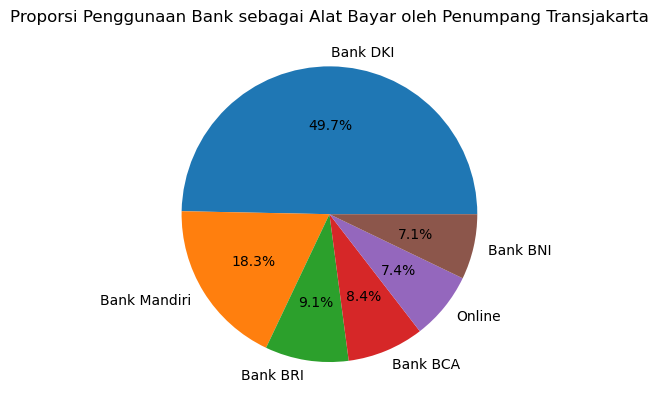

In [40]:
# menampilkan visualisasi proporsi penggunaan bank oleh penumpang Transjakarta

plt.pie(passenger_bank_sorted['jumlah_pengguna'], labels=passenger_bank_sorted['nama_bank'], autopct='%1.1f%%')
plt.title('Proporsi Penggunaan Bank sebagai Alat Bayar oleh Penumpang Transjakarta')
plt.show()

--> *Hampir setengah dari jumlah penumpang Transjakarta atau sebanyak 49.4% merupakan pengguna kartu uang elektronik terbitan Bank DKI. Proporsi terbanyak berikutnya berturut-turut adalah emoney terbitan Bank Mandiri, flazz terbitan Bank BCA, brizzi terbitan Bank BRI, bni terbitan Bank BNI dan sisanya melakukan pembayaran online.*

<hr>

**<h2><center>*Insight*<h2></center>**

<hr>

### **1. Wawasan**

Berdasarkan *Exploratory Data Analysis* (EDA) yang telah dilakukan di atas, terdapat beberapa wawasan bisnis yang dapat dipertimbangkan oleh *stakeholders* PT Transjakarta untuk mengupayakan peningkatan pendapatan perusahaan dan menekan subsidi pemerintah, di antaranya seperti di bawah ini.

1. **Berdasarkan informasi perjalanan penumpang Transjakarta:**
- Terkait proporsi subsidi yang diberikan, analisis ini menjumpai bahwa proporsi pemeberian subsidi terbilang cukup besar berdasarkan data pembayaran tarif penumpang angkutan umum Transakata yang bernilai Rp. 0-:

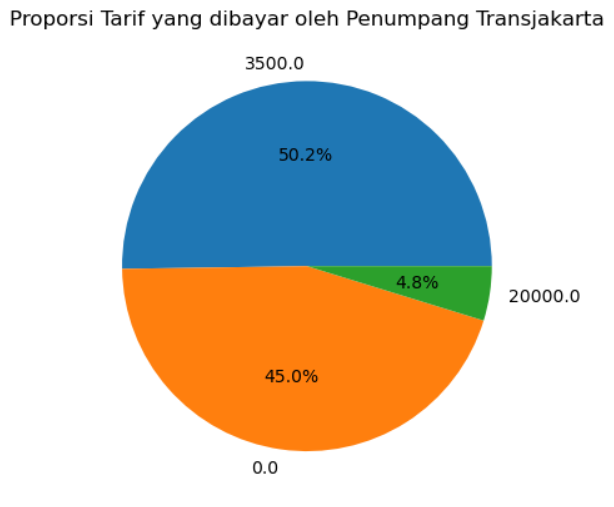

Proporsi sebesar 45% menunjukan besaran penumpang yang diberikan subsidi perjalanan oleh pemerintah dari total seluruh transaksi penumpang Transjakarta. Oleh sebabitu, *stakeholders* PT Transjakarta perlu mengevalusi target subsidi atau perjalanan gratis yang diberikan guna meningkatkan profit perusahaan.

- Analisis ini menunjukan beberapa peluang optimalisasi tarif angkutan umum transjakarta dengan beberapa pertimbangan di antaranya adalah:
    - Berdasarkan **Rute atau Koridor** dengan intesitas atau frekuensi yang pali tinggi:

    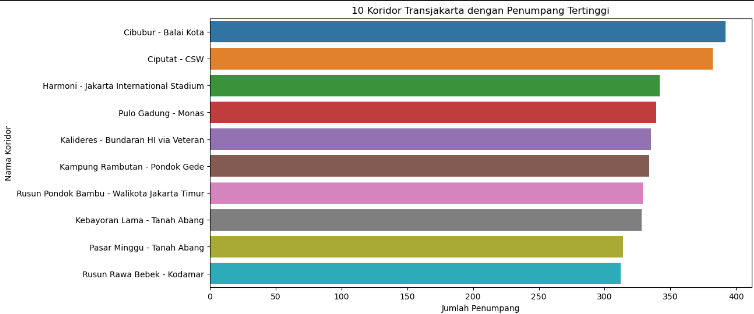

    10 rute dengan intensitas/frekuensi yang paling tinggi dari sekitan 200an rute dapat diberlakukan harga khusus karena *trafic*nya yang tinggi tersebut. Hal ini dapat dijadikan pelung untuk mengoptimalkan pendapat perusahaan.

    - Atau hal serupa juga dapat diimplementasikan berdasarkan pola perjalanan dengan frekuensi traaansaksi tertinggi:

    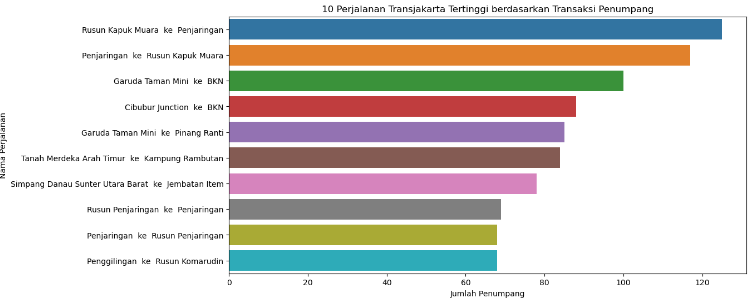


2. **Berdasarkan informasi karakteristk penumpang Transjakarta:**
- Dalam rangka meningkatkan pelayanan penumpang Transjakarta, *stakeholders* PT Transjakarta dapat mempertimbangkan distribusi atau karakteristik penumpang Transjakarta. Beberapa hal yang dapa dipertimbangkan:
    - Distribusi gender:
    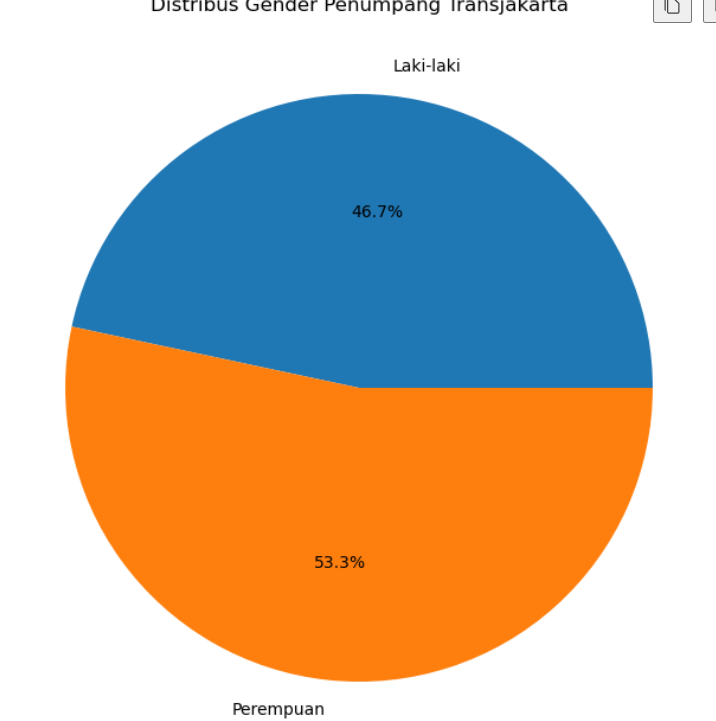

    Hasil analisis menunjukan proporsi perempuan memiliki tingkat proporsi lebih tinggi daripada proporsi laki-laki. Meskipun selisihnya tidak sampai 5%, tetapi tingkat proporsi perempuan yang tinggi dapat memberikan pertimbangan kepada *stakeholders* PT Transjakarta untuk memperhatikan kenyamanan penumpang perempuan dari segi halte hingga armada.

    -Distribusi usia:
    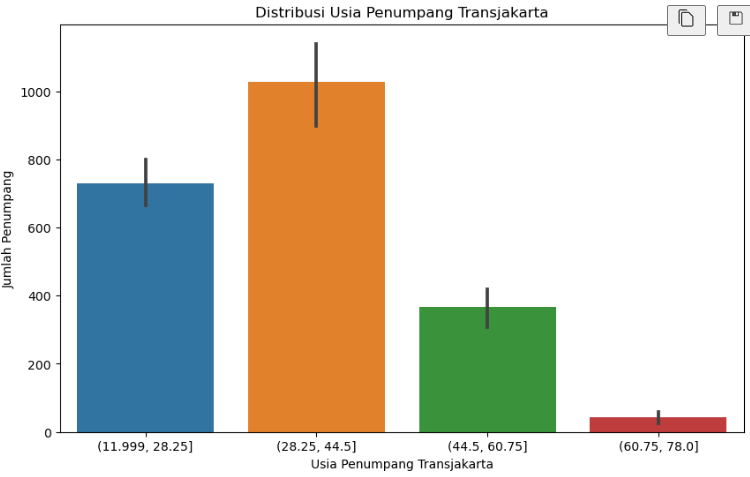

    Hasils analisis menunjukan distribusi usia sekitar 20-40 menjadi kelompok penumpang Transjakarta tertinggi. Kelompok usia tersebut mencerimkan usia produktif yang mana sebagain atau bahkan keseluruhan mereka adalah pekerja sehingga upaya penyesuaian tarif Transjakarta boleh jadi tidak akan berdampak signifikan.

    -Distribusi Penggunaan Bank:
    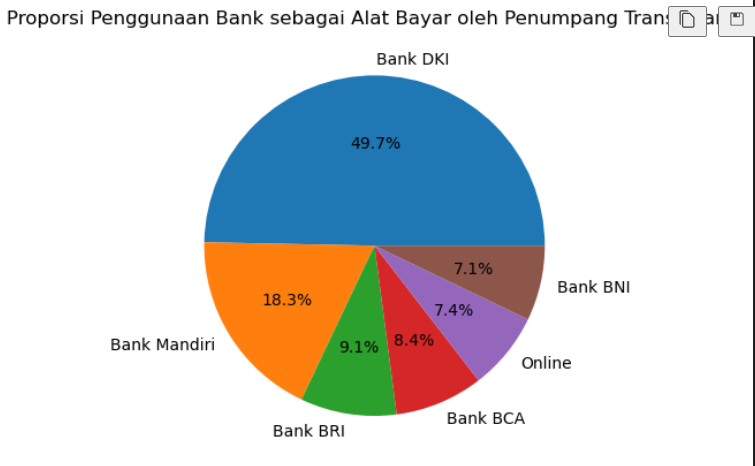

    Hampir setengah dari jumlah penumpang Transjakarta atau sebanyak 49.4% merupakan pengguna kartu uang elektronik terbitan Bank DKI. Bank DKI juga merupakan BUMD seperti PT Transjakarta, hal ini dapat merekomendasikan beban subsidi bisa didukung oleh Bank DKI karea proporsi penumpang Transjakarta yang tinggi yang menggunakan kartu auang elektronik terbitan bank tersebut. Dalam menekan subsidi berdasarkan profit juga dapat dilakukan dengan pola kemitraan. Membuat paket atau bundling khusus yang meningkatkan penjualan tiket Transjakarta yang pada giliannya akan meningkatkan pendapatan perusahaan.


<hr>

### **2. Saran/Rekomendasi**
Setelah menarik benang merah hasil analisis di atas, beberapa reomendasi yang dapat penulis sarankan:
1. Mengkaji ulang atau mengevaluasi target subsidi perjalanan gratis yang diberikan kepada penumpang angkutan umum Transjakarta. Mengingat proporsi perjalanan gratis hampir menyentuh angka 50% maka perlu ditinjau kembali kebijakan tersebut. Hal ini diharapkan dapat meningkatkan pendapatan perusahaan karena menekan beban subsidi.
2. Terus meningkatkan pelayanan penumpang Transjakarta dengan salah satunya memperhatikan aspek gender. Terus meningkatkan kuantitas armada khusus perempuan dan memperhatiakan halte yang ramah perempuan seperti section khsusus perempuan.
3. Mempertimbangkan skema optimalisasi tarif angkutan umum Transjakarta dimana skema *flat-fare* atau tarif flat mulai tidak relevan ketika hendak menekan subsidi. Oleh sebab itu, analsis ini merekomendasikan beberapa skema tarif baru berdasarkan rute atau pola perjalanan sebagaimana dijelaskan sebelumnya.
4. Mengekplorasi pola kemitraan untuk membuat paket pemebelian tiket. Hal ini memberikan benefit tidak ghanyab kepada perusahaan tetapi juga kepada penumpanmg karena tidak perlu selalu mengisi uang elektroniknya.
<hr>


### **3. Rujukan:**

1. Hariani, Mira Lestari., Idwan Santoso dan Sony Su;alsono Wibowo. (2020). *'Analisis Kebijakan Struktur Tarif dan Pengaruhnya terhadap Besaran Subsid (Studi Kasus: Transjakarta)'* dalam Jurnal Manajemen Aset Infrastruktur & Fasilitas - Vol. 4., No. 3.



<hr>
<hr>



**<h2><center>Terima Kasih<h2></center>**



<hr>
<hr>